In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Tracer un graphe

Examiner le code suivant qui trace le graphe de la fonction 
$$
f\colon x\mapsto x \sin x
$$
sur $[0,2\pi]$.

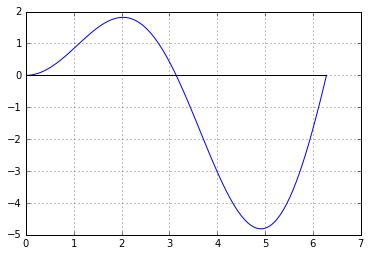

In [2]:
#definition de la fonction
def f(x):
    y=x*sin(x)
    return y

#discretisation des abscisses
a=0
b=2*pi
n=100
X=linspace(a,b,n)

#calcul des ordonnées
Y=zeros(n)
for i in range(n):
    Y[i]=f(X[i])
    
#tracé du graphe
plot(X,Y)

#axe des abscisses
plot([a,b],[0,0],'k-')

#grille
grid()


In [3]:
#pour des infos sur la commande plot et ses arguments optionnels

?plot

Tracer les graphes de $\exp$ et $x\mapsto x^3$ sur $[-1,1]$

# Méthodes d'intégration numérique

## Méthodes élémentaires 

Les méthodes élémentaires remplacent l'intégrale d'une fonction $f$ sur $[a,b]$ par l'intégrale $J(f,a,b)$ 
d'une fonction plus simple: constante, affine, parabole, etc.

**Rectangle à gauche:** on remplace $f$ par la fonction constante égale à sa valeur en $a$,

$$
J^{R}(f,a,b)=(b-a) f(a).
$$

**Point-milieu:** on remplace $f$ par la fonction constante égale à sa valeur en $m=\frac{a+b}{2}$,

$$
J^{PM}(f,a,b)=(b-a)f\left(m\right).
$$

**Trapèze:** on remplace $f$ par la fonction affine qui coïncide avec $f$ en $a$ et en $b$,

$$
J^T(f,a,b) =(b-a)\frac{f(a)+f(b)}{2}.
$$

**Simpson:** on remplace $f$ par le polynôme $\tilde f$ de degré 2 qui coïncide avec $f$ en $a$, $m=\frac{a+b}{2}$ et $b$, c'est-à-dire,

\begin{align*}
\tilde f(x) & =f(a)\frac{(x-m)(x-b)}{(a-m)(a-b)} +f(m)\frac{(x-a)(x-b)}{(m-a)(m-b)} 
+f(b) \frac{(x-a)(x-m)}{(b-a)(b-m)},
\end{align*}

ce qui donne, après calcul,

$$
J^{S}(f,a,b)=(b-a)\frac{f(a)+4f(m)+f(b) }{6}.
$$



Ecrire des fonctions **Rectangle**, **PointMilieu**, **Trapeze**, **Simpson**, qui pour les entrées $f,a,b$, retournent la valeur $J(f,a,b)$ obtenue par la méthode élémentaire correspondante.

Tester ces méthodes élémentaires avec les monômes $x\mapsto 1,x,x^2,x^3,x^4$ sur $[0,1]$. Que remarque-t-on?

## Méthodes composites

L'idée des méthodes composites est d'utiliser une subdivision $a = x_0 < x_1 < ... < x_n = b$ de $[a,b]$, de sorte que

$$
\int_a^b f(x)\, dx
=\int_{x_0}^{x_1} f(x)\, dx + \cdots +\int_{x_{n-1}}^{x_n} f(x)\, dx,
$$

et d'approximer chaque intégrale sur $[x_i,x_{i+1}]$ par une méthode élémentaire $J(f,x_i,x_{i+1})$.

En pratique on utilisera un découpage régulier de l'intervalle $[a,b]$:

$$
x_i =a + i \frac{b-a}{n},\qquad i=0,1,\ldots, n,
$$
et l'approximation donnée par la méthode composite est

$$
J_c(f,a,b,n)=J(f,x_0,x_1) + \cdots + J(f,x_{n-1},x_n).
$$


Ecrire une fonction **Comp** qui prend en entrée une méthode élémentaire $J_e$, la fonction $f$, les bornes $a,b$ de l'intervalle d'intégration et le nombre $n$ de sous-intervalles, et retourne la valeur approchée $J_c(f,a,b,n)$ donnée par la méthode composite correspondante.

Utiliser cette fonction pour calculer l'intégrale 
$$
I=\int_0^1 e^{x}\, dx,
$$
avec les 4 méthodes élémentaires décrites plus haut. 
A $n$ fixé, comparer l'erreur produite par chacune des méthodes.

## Ordre de chaque méthode

Représenter graphiquement, pour chaque méthode, l'erreur 

$$
E_n=|I-J_c(\exp,0,1,n)|,
$$

en fonction de $n$. (On pourra prendre un échantillon bien choisi de valeurs de $n$ entre $1$ et $1000$.)

Représenter $\log E_n$ en fonction de $\log(n)$. (On pourra utiliser la commande *loglog*.)

Une méthode est d'ordre $\alpha$ si son erreur est d'ordre $\frac{C}{n^\alpha}$.

Pour tout $C>0$ et $\alpha>0$, montrer que 
$$
E_n \sim \frac{C}{n^\alpha}
\quad
\Rightarrow
\quad
\log E_n = \log C -\alpha \log n +o(1)
$$

Utiliser cette observation pour retrouver, à partir des calculs précédents, l'ordre des quatre méthodes utilisées. Comparer avec les tests des méthodes élémentaires sur les monômes.

# Calcul d'un signal moyen

On suppose qu'on dispose du signal bleu $s$ tracé ci-dessous en fonction du temps $t$. 

('mu = ', array([ 9.28529608]))


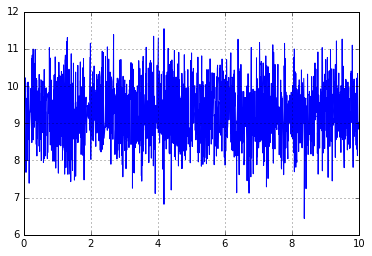

In [4]:
n = 2000
t_echant = sort(random.uniform(0,10,size=n))
mumax = 10
mu = random.uniform(0,mumax,size=1)
ecarttype = random.uniform(0,mu*0.1,size=1)
#s_echant = sin(2*t_echant)+numpy.random.normal(mu,ecarttype,size=n)
s_echant = random.normal(mu,ecarttype,size=n)

figure(100)
plot(t_echant,s_echant)
print("mu = ",mu)
grid()

On demande de calculer la valeur moyenne de ce signal au cours du temps afin d'en avoir une vision résumée, quitte à perdre un peu d'information.

Plus précisément, on cherche à tracer en fonction du temps $t$ 
$$
s_{moy}(t) := \dfrac{1}{t} \int_{t_0}^t s(u) du.
$$

Comme l'expression analytique du signal bleu $s$ n'est pas connue, on doit approcher l'intégrale à l'aide des valeurs dont on dispose dans les tableaux $t_{echant}$ et $s_{echant}$.

Tracer sur le même graphe 
+ le signal $s$ en bleu,
+ et sa valeur moyenne calculée par la méthode des trapèzes en rouge.

# Une integrale sur un intervalle non compact

Tracer, en utilisant une des méthodes composites décrites plus haut, le graphe de la fonction

$$
x\mapsto \int_0^x e^{-t^2}\, dt
$$

sur $[0,+\infty[$. Admet-elle une limite en $+\infty$ ? Conjecturer sa valeur (on pourra la mettre au carré et multiplier par 2).


# Une intégrale impropre

Tracer le graphe de la fonction 

$$
x\mapsto \int_0^x \frac{\sin t}{t}\, dt
$$

sur $[0,+\infty[$. Admet-elle une limite en $+\infty$ ? Qu'en est-il de 

$$
x\mapsto \int_0^x \left| \frac{\sin t}{t}\right|\, dt \qquad\text{?}
$$
